In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from pydataset import data

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

import wrangle_lugo as wl

In [2]:
df = wl.get_wine_data()

In [3]:
df = wl.prep_wine_data(df)

In [4]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,wine_type_white_wine
0,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.9968,3.39,0.53,9.4,6,red_wine,0
1,6.3,0.390,0.16,1.4,0.080,11.0,23.0,0.9955,3.34,0.56,9.3,5,red_wine,0
2,7.6,0.410,0.24,1.8,0.080,4.0,11.0,0.9962,3.28,0.59,9.5,5,red_wine,0
3,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.9993,3.45,0.52,9.4,6,red_wine,0
4,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,7,red_wine,0


In [5]:
# drop the 'wine_type' column
df = df.drop('wine_type', axis=1)

In [6]:
tr, val, ts = wl.get_split(df)

In [7]:
target = 'quality'

In [8]:
X_tr, X_val, X_ts, y_tr, y_val, y_ts, to_scale, baseline = wl.get_Xs_ys_to_scale_baseline(tr, val, ts, target)

In [9]:
X_tr_sc, X_val_sc, X_ts_sc = wl.scale_data(X_tr,X_val,X_ts,to_scale)

In [10]:
baseline

5.931135531135531

## Clustering with the wine_quality dataset

* Using this lesson as a guide, perform clustering on the wine_quality dataset.

* Choose features other than the ones used in the lesson.

* Visualize the results of your clustering.
* Use the elbow method to visually select a good value for k.

In [68]:
X_tr2 = X_tr_sc[['density', 'chlorides']]

## Explore
* We explored all the things!

* hypothesize
* visualize
* statisticize
* summarize
* We found that age, annual_income, and spending score looked like were good canidates for clusters.

* We utilized the elbow method to determine the best number of clusters

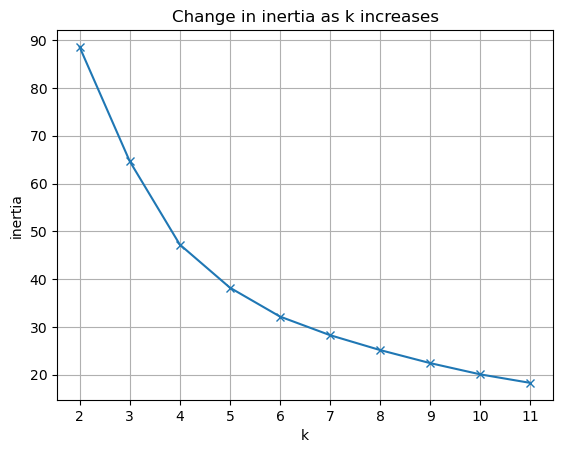

In [69]:
# lets plot inertia vs k
pd.Series(
    {k: KMeans(k, random_state=123, n_init=10)\
     .fit(X_tr2).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')
plt.grid()

In [70]:
#make it
kmeans = KMeans(n_clusters = 3, random_state=123, n_init=10)

#fit it
kmeans.fit(X_tr2)

#use it
kmeans.predict(X_tr2)

array([0, 2, 0, ..., 0, 0, 0], dtype=int32)

In [71]:
# And assign the cluster number to a column on the dataframe
X_tr2["cluster"] = kmeans.predict(X_tr2)
X_tr2.head()

,density,chlorides,cluster
1377,0.169273,0.450704,0
2596,0.824609,0.408451,2
3016,0.280082,0.464789,0
3852,0.280082,0.521127,0
1507,0.495581,0.352113,0


In [72]:
tr.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type_white_wine,quality_cat,cluster
1377,7.1,0.44,0.37,2.7,0.041,35.0,128.0,0.98960,3.07,0.43,13.5,7,1,7-9,0
2596,6.5,0.23,0.36,16.3,0.038,43.0,133.0,0.99924,3.26,0.41,8.8,5,1,3-6,0
3016,6.7,0.33,0.36,6.6,0.042,34.0,116.0,0.99123,2.97,0.31,12.2,8,1,7-9,0
3852,7.5,0.21,0.29,1.5,0.046,35.0,107.0,0.99123,3.15,0.45,11.3,6,1,3-6,0
1507,8.2,0.22,0.36,6.8,0.034,12.0,90.0,0.99440,3.01,0.38,10.5,8,1,7-9,2


* Step 1: Explore the clusters
* Step 2: Name the clusters
* Step 3:
* Option 1: Dimensionality reduction
* Option 2: Treat cluster names as a new target variable
* Option 3: Perform deeper EDA
* Option 4: Make many models

## Step 1: Explore the clusters

* see how they are similiar or different

### Density and Chlorides

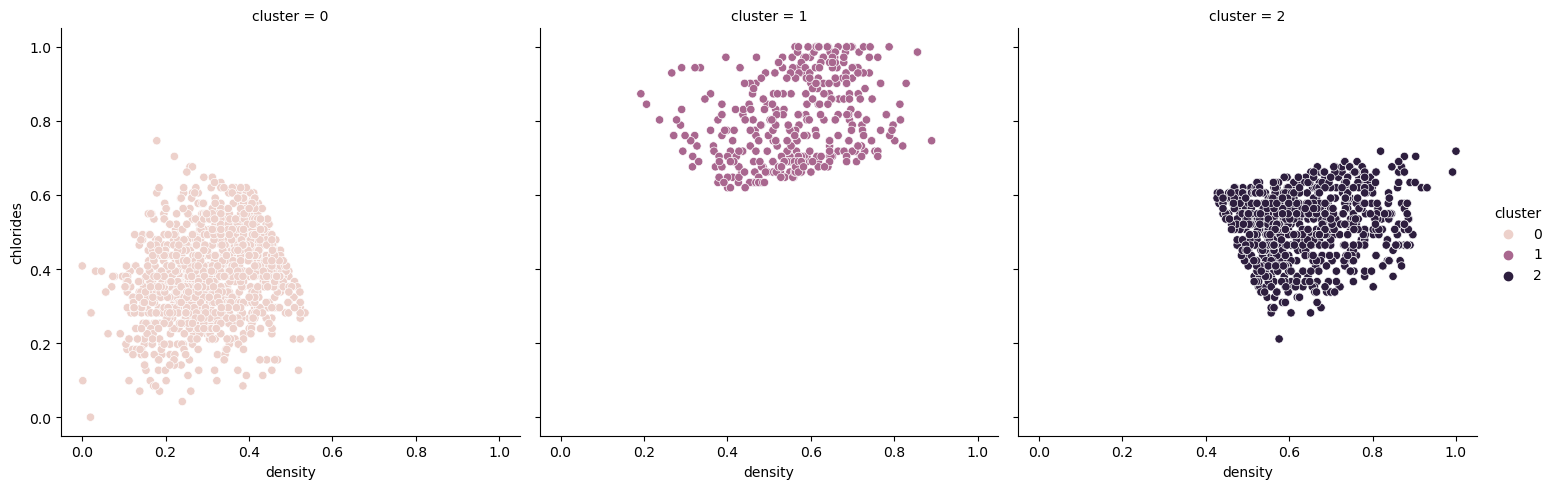

In [73]:
# plot out income vs. spending with regard to the cluster and age
sns.relplot(data=X_tr2,
           x='density',
           y='chlorides',
           hue='cluster',
           col='cluster',
           col_wrap=3)
plt.show()

# select the columns for X_tr2
X_tr2 = df[['density', 'chlorides']]

# load the y_tr dataset
y_tr2 = tr[['quality']]

# create a scatter plot with different colors for each quality level
sns.scatterplot(x='density', y='chlorides', hue='quality', data=X_tr2.join(y_tr2))
plt.xlabel('Density')
plt.ylabel('Chlorides')
plt.title('Density vs Chlorides by Quality')
plt.show()

In [74]:
# bin the 'quality' variable as 3-6 and 7-9
tr['quality_cat'] = pd.cut(tr['quality'], bins=[2, 6, 9], labels=['3-6', '7-9'])

In [75]:
y_tr2 = tr[['quality_cat']]

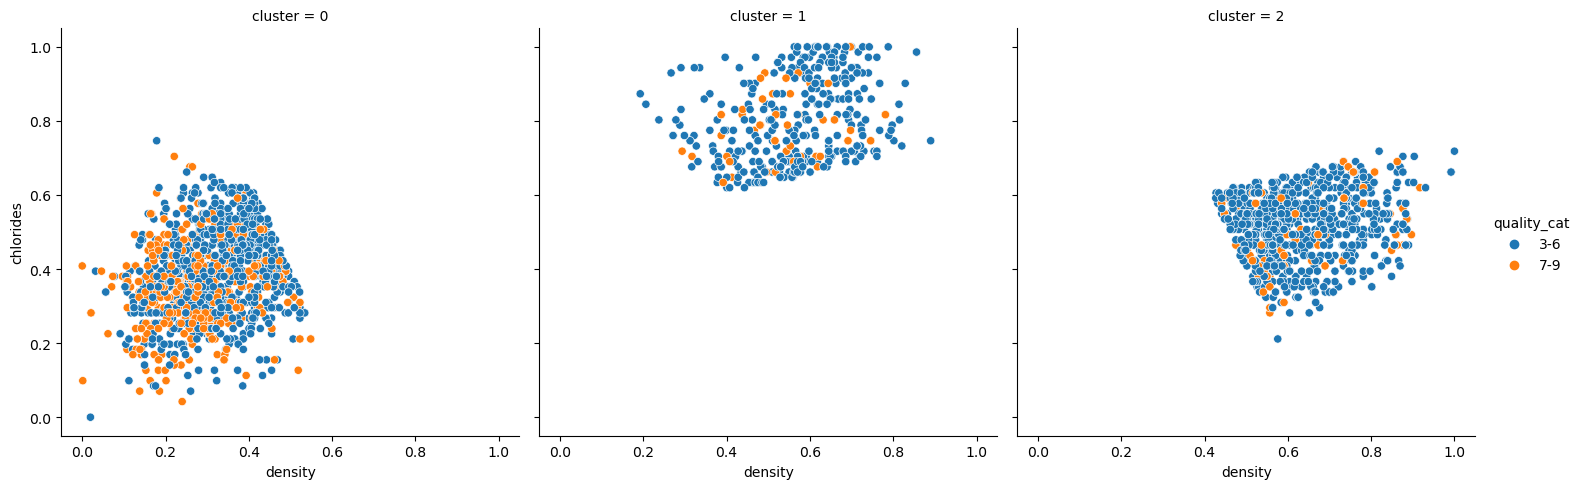

In [76]:
sns.relplot(data=X_tr2.join(y_tr2),
           x='density',
           y='chlorides',
           hue='quality_cat',
           col='cluster',
           col_wrap=3)
plt.show()

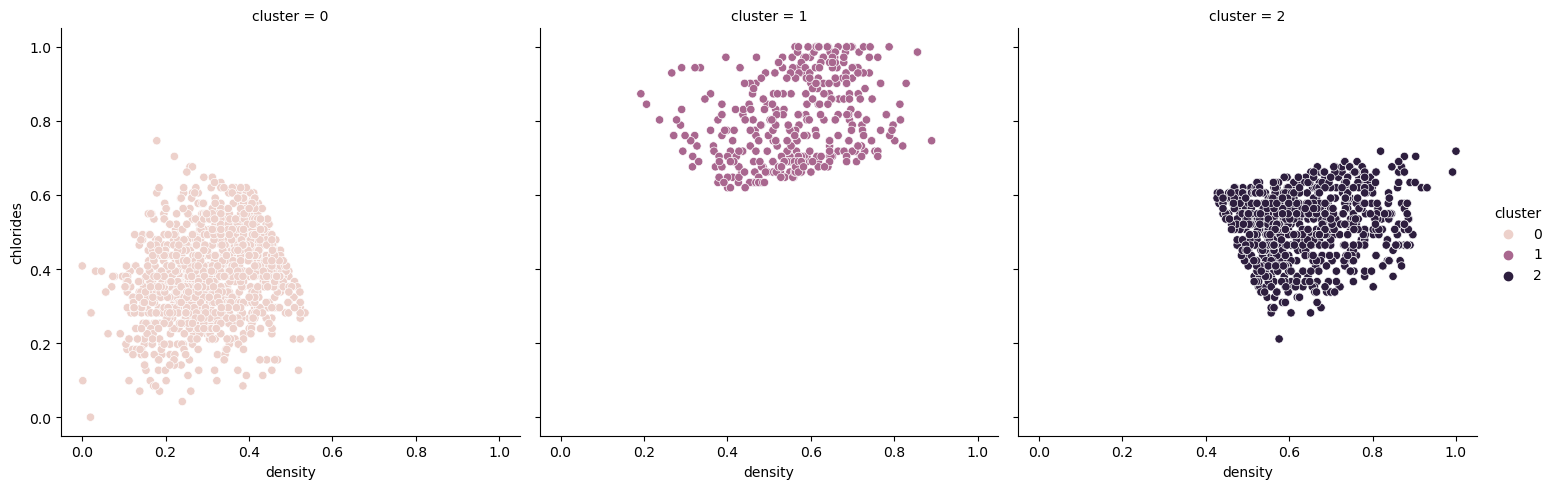

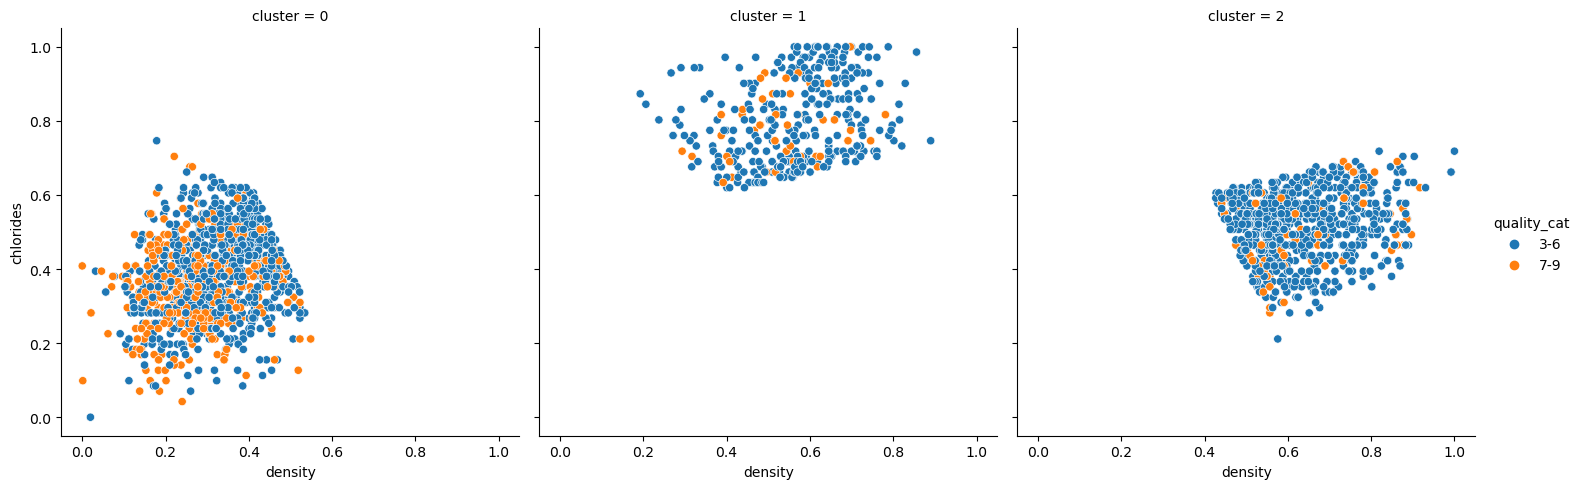

In [77]:
# create the first scatter plot
sns.relplot(data=X_tr2,
           x='density',
           y='chlorides',
           hue='cluster',
           col='cluster',
           col_wrap=3)

# create the second scatter plot
sns.relplot(data=X_tr2.join(y_tr2),
           x='density',
           y='chlorides',
           hue='quality_cat',
           col='cluster',
           col_wrap=3)

# show the plots
plt.show()

In [78]:
#rename using map
tr['cluster'] = X_tr2.cluster.map({
    0:'low_chloride_low_density_chlorides',
    1:'high_chloride_high_density_chlorides',
    2:'med_chloride_med_density_chlorides'
})

In [80]:
tr.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type_white_wine,quality_cat,cluster
1377,7.1,0.44,0.37,2.7,0.041,35.0,128.0,0.98960,3.07,0.43,13.5,7,1,7-9,low_chloride_low_density_chlorides
2596,6.5,0.23,0.36,16.3,0.038,43.0,133.0,0.99924,3.26,0.41,8.8,5,1,3-6,med_chloride_med_density_chlorides
3016,6.7,0.33,0.36,6.6,0.042,34.0,116.0,0.99123,2.97,0.31,12.2,8,1,7-9,low_chloride_low_density_chlorides
3852,7.5,0.21,0.29,1.5,0.046,35.0,107.0,0.99123,3.15,0.45,11.3,6,1,3-6,low_chloride_low_density_chlorides
1507,8.2,0.22,0.36,6.8,0.034,12.0,90.0,0.99440,3.01,0.38,10.5,8,1,7-9,low_chloride_low_density_chlorides


In [56]:
X_tr2

,density,chlorides,cluster
1377,0.98960,0.041,med_chloride_med_density_chlorides
2596,0.99924,0.038,low_chloride_low_density_chlorides
3016,0.99123,0.042,med_chloride_med_density_chlorides
3852,0.99123,0.046,med_chloride_med_density_chlorides
1507,0.99440,0.034,low_chloride_low_density_chlorides
...,...,...,...
4537,0.99492,0.048,med_chloride_med_density_chlorides
350,0.99120,0.038,low_chloride_low_density_chlorides
1305,0.99460,0.030,low_chloride_low_density_chlorides
4343,0.98975,0.036,low_chloride_low_density_chlorides


### Takeaways
* low chloride, low density high quality is a possible cluster

### Alcohol and Residual Sugar

In [20]:
X_tr3 = X_tr[['alcohol', 'residual_sugar']]

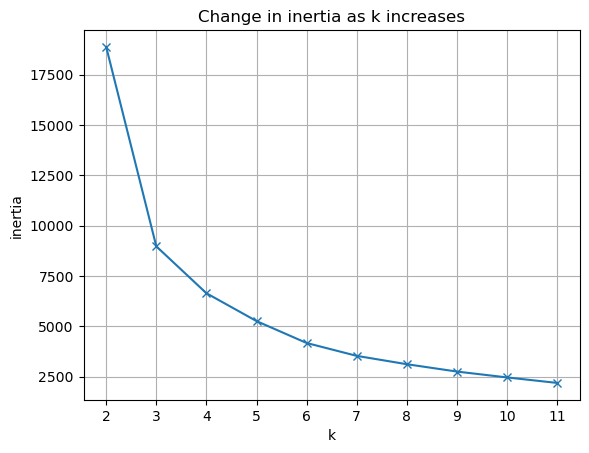

In [22]:
# lets plot inertia vs k
pd.Series(
    {k: KMeans(k, random_state=123, n_init=10)\
     .fit(X_tr3).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')
plt.grid()

In [23]:
#make it
kmeans = KMeans(n_clusters = 3, random_state=123, n_init=10)

#fit it
kmeans.fit(X_tr3)

#use it
kmeans.predict(X_tr3)

array([0, 2, 1, ..., 1, 0, 0], dtype=int32)

In [24]:
# And assign the cluster number to a column on the dataframe
X_tr3["cluster"] = kmeans.predict(X_tr3)
X_tr3.head()

,alcohol,residual_sugar,cluster
1377,13.5,2.7,0
2596,8.8,16.3,2
3016,12.2,6.6,1
3852,11.3,1.5,0
1507,10.5,6.8,1


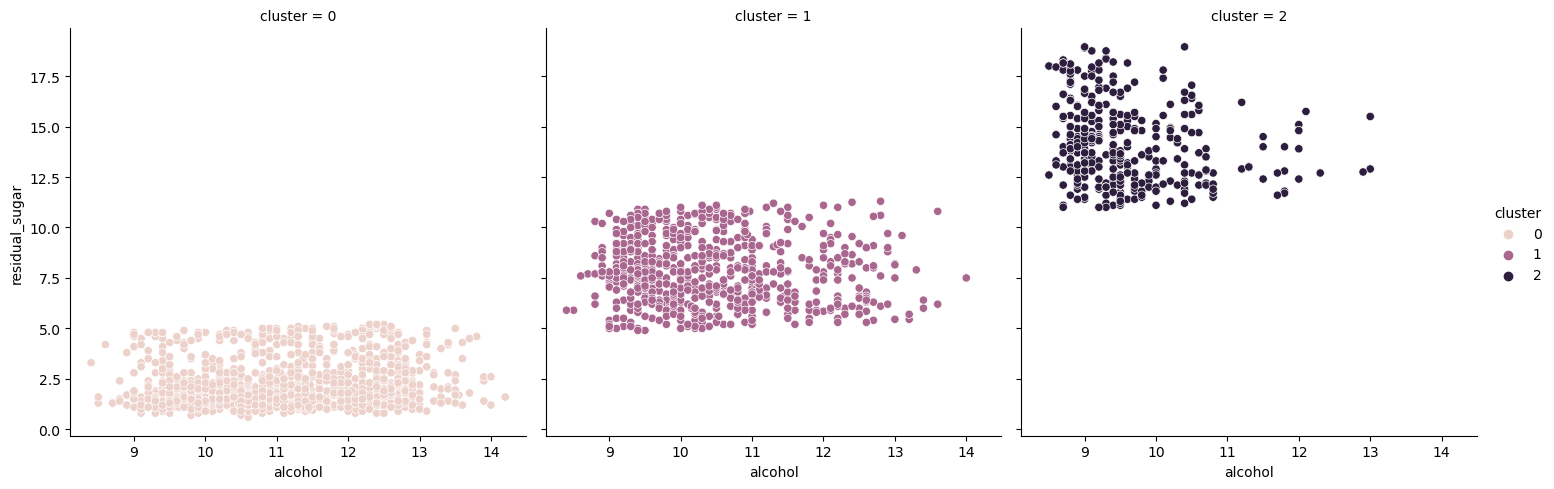

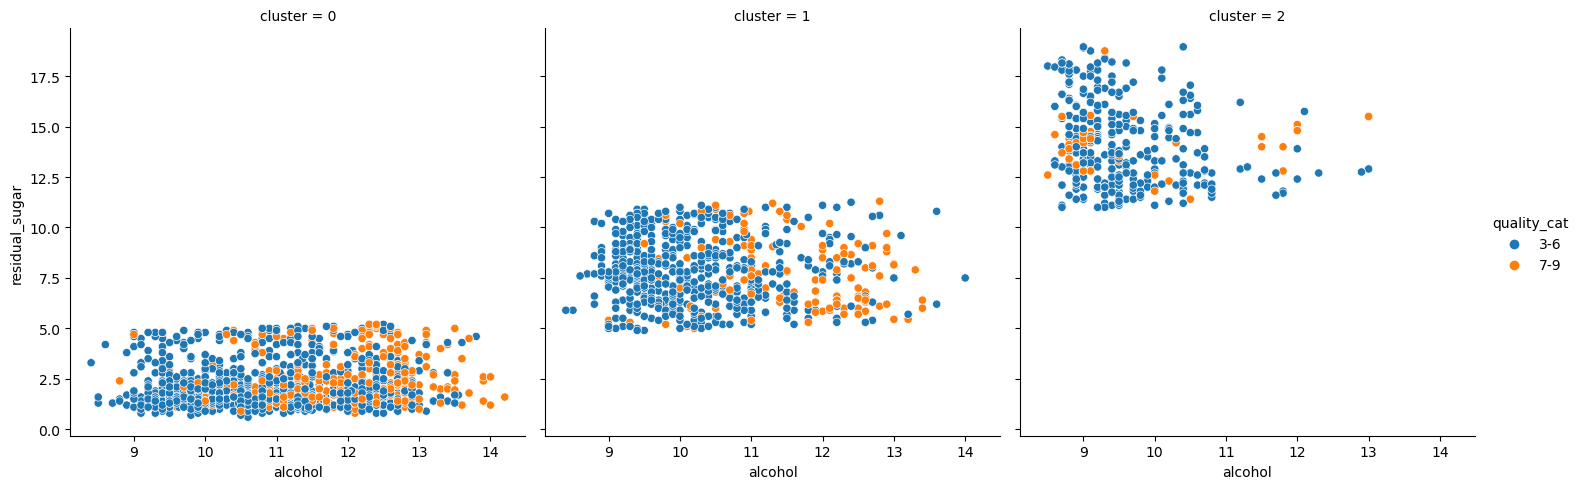

In [26]:
# create the first scatter plot
sns.relplot(data=X_tr3,
           x='alcohol',
           y='residual_sugar',
           hue='cluster',
           col='cluster',
           col_wrap=3)

# create the second scatter plot
sns.relplot(data=X_tr3.join(y_tr2),
           x='alcohol',
           y='residual_sugar',
           hue='quality_cat',
           col='cluster',
           col_wrap=3)

# show the plots
plt.show()

### Takeaways
* No clusters

### Total Sulpher Dioxide and Residual Sugar

In [31]:
X_tr4 = X_tr[['total_sulfur_dioxide', 'residual_sugar']]

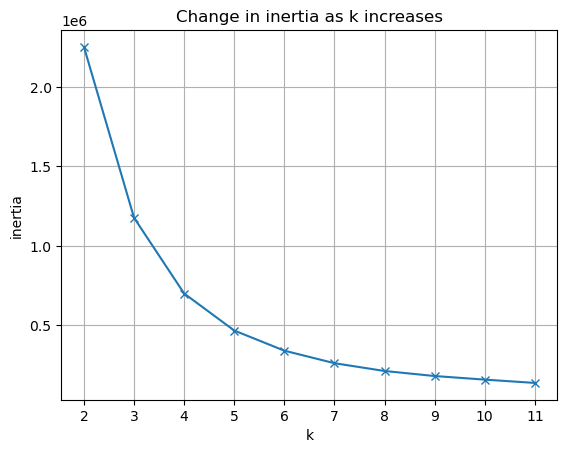

In [32]:
# lets plot inertia vs k
pd.Series(
    {k: KMeans(k, random_state=123, n_init=10)\
     .fit(X_tr4).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')
plt.grid()

In [33]:
#make it
kmeans = KMeans(n_clusters = 3, random_state=123, n_init=10)

#fit it
kmeans.fit(X_tr4)

#use it
kmeans.predict(X_tr4)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [34]:
# And assign the cluster number to a column on the dataframe
X_tr4["cluster"] = kmeans.predict(X_tr4)
X_tr4.head()

,total_sulfur_dioxide,residual_sugar,cluster
1377,128.0,2.7,0
2596,133.0,16.3,0
3016,116.0,6.6,0
3852,107.0,1.5,0
1507,90.0,6.8,2


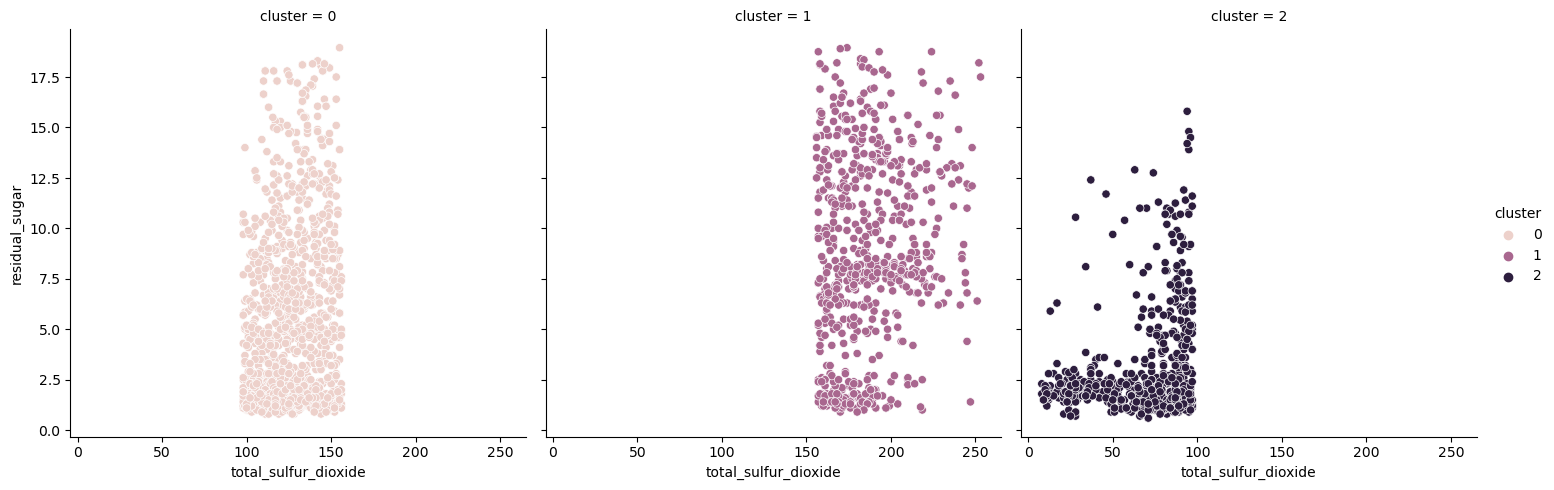

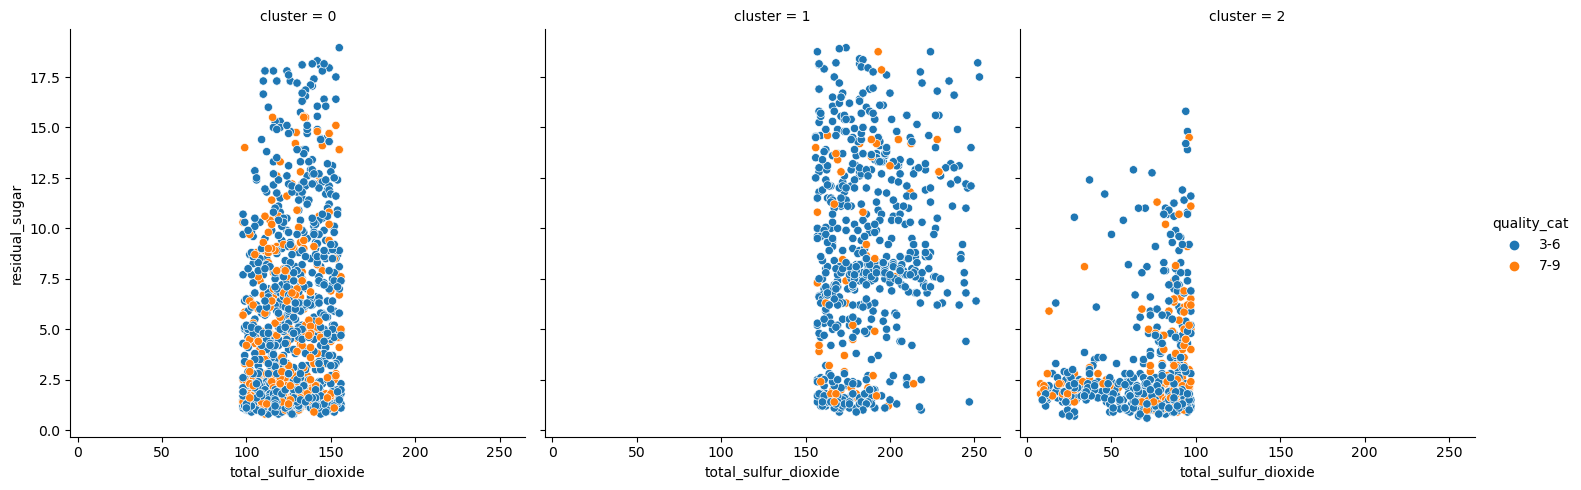

In [35]:
# create the first scatter plot
sns.relplot(data=X_tr4,
           x='total_sulfur_dioxide',
           y='residual_sugar',
           hue='cluster',
           col='cluster',
           col_wrap=3)

# create the second scatter plot
sns.relplot(data=X_tr4.join(y_tr2),
           x='total_sulfur_dioxide',
           y='residual_sugar',
           hue='quality_cat',
           col='cluster',
           col_wrap=3)

# show the plots
plt.show()

### Takeaways
* No clusters

### Alcohol and Chlorides

In [36]:
X_tr5 = X_tr[['alcohol', 'chlorides']]

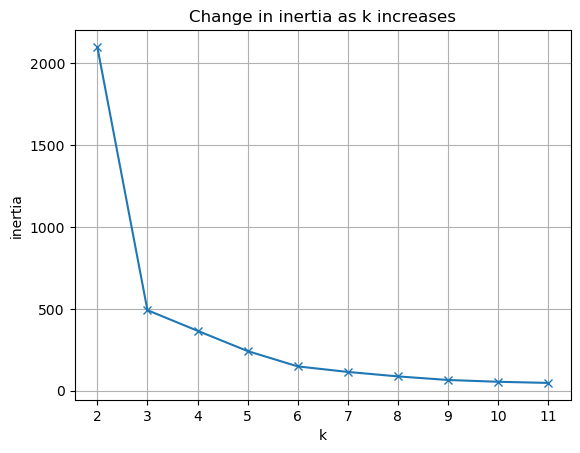

In [45]:
# lets plot inertia vs k
pd.Series(
    {k: KMeans(k, random_state=123, n_init=10)\
     .fit(X_tr5).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')
plt.grid()

In [46]:
#make it
kmeans = KMeans(n_clusters = 3, random_state=123, n_init=10)

#fit it
kmeans.fit(X_tr5)

#use it
kmeans.predict(X_tr5)

array([2, 1, 2, ..., 0, 2, 0], dtype=int32)

In [47]:
# And assign the cluster number to a column on the dataframe
X_tr5["cluster"] = kmeans.predict(X_tr5)
X_tr5.head()

,alcohol,chlorides,cluster
1377,13.5,0.041,2
2596,8.8,0.038,1
3016,12.2,0.042,2
3852,11.3,0.046,0
1507,10.5,0.034,0


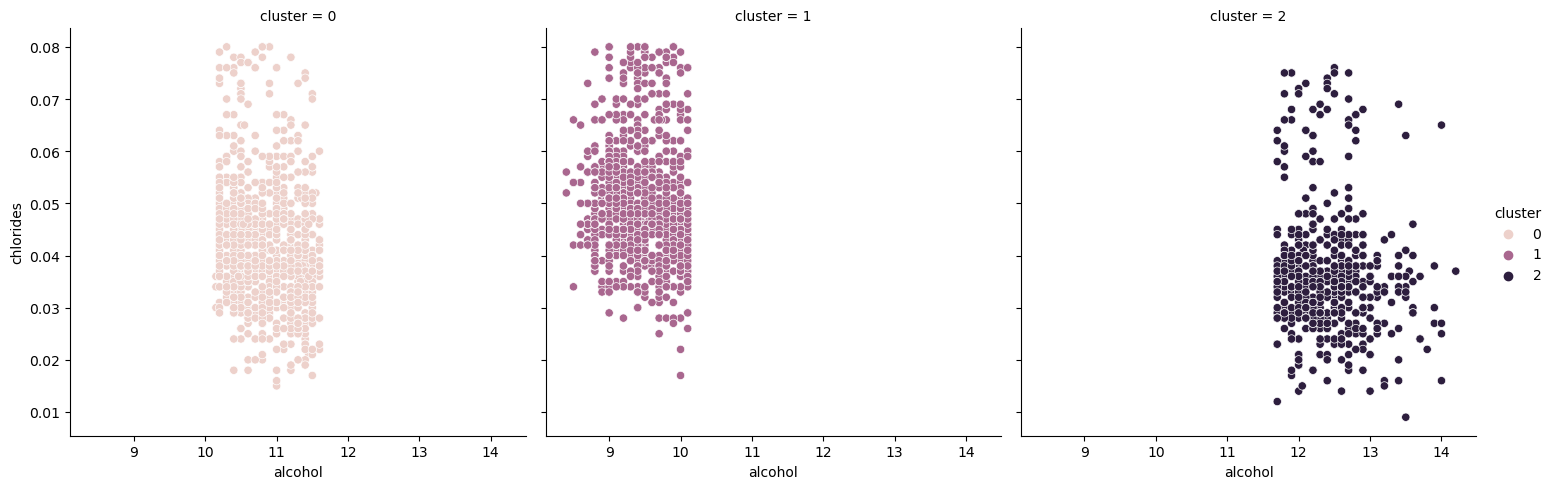

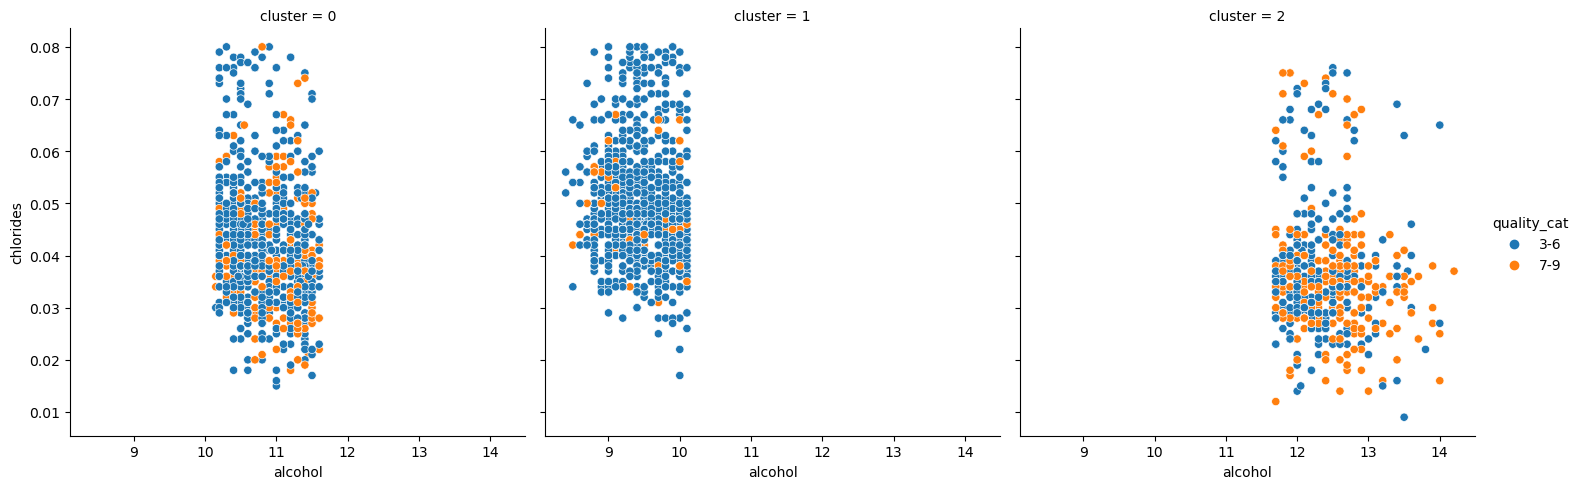

In [54]:
# create the first scatter plot
sns.relplot(data=X_tr5,
           x='alcohol',
           y='chlorides',
           hue='cluster',
           col='cluster',
           col_wrap=3)

# create the second scatter plot
sns.relplot(data=X_tr5.join(y_tr2),
           x='alcohol',
           y='chlorides',
           hue='quality_cat',
           col='cluster',
           col_wrap=3)

# show the plots
plt.show()

### Takeaways
* Possible cluster in high alcohol and high quality

### Volatile Acidity and Citric Acid

In [49]:
X_tr6 = X_tr[['volatile_acidity', 'citric_acid']]

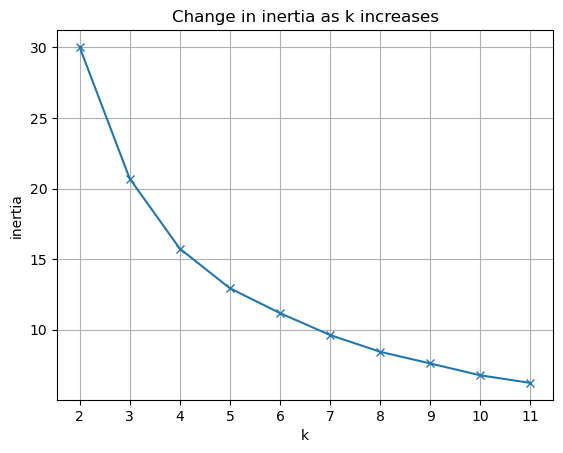

In [50]:
# lets plot inertia vs k
pd.Series(
    {k: KMeans(k, random_state=123, n_init=10)\
     .fit(X_tr6).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')
plt.grid()

In [51]:
#make it
kmeans = KMeans(n_clusters = 3, random_state=123, n_init=10)

#fit it
kmeans.fit(X_tr6)

#use it
kmeans.predict(X_tr6)

array([1, 0, 2, ..., 0, 1, 0], dtype=int32)

In [52]:
# And assign the cluster number to a column on the dataframe
X_tr6["cluster"] = kmeans.predict(X_tr6)
X_tr6.head()

,volatile_acidity,citric_acid,cluster
1377,0.44,0.37,1
2596,0.23,0.36,0
3016,0.33,0.36,2
3852,0.21,0.29,0
1507,0.22,0.36,0


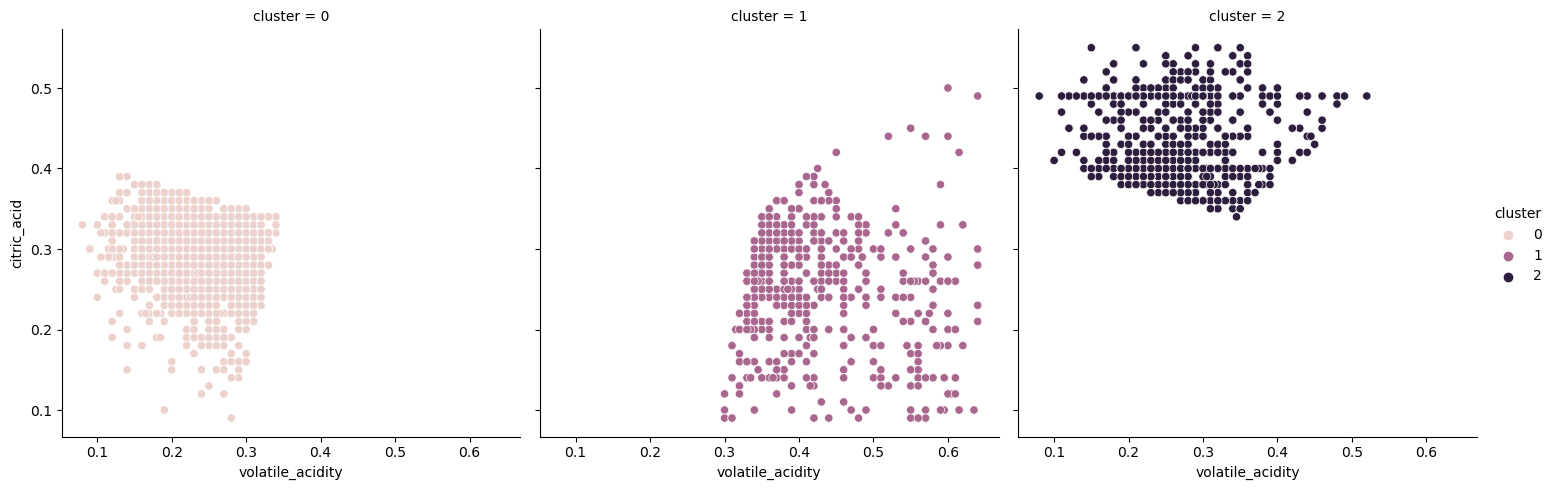

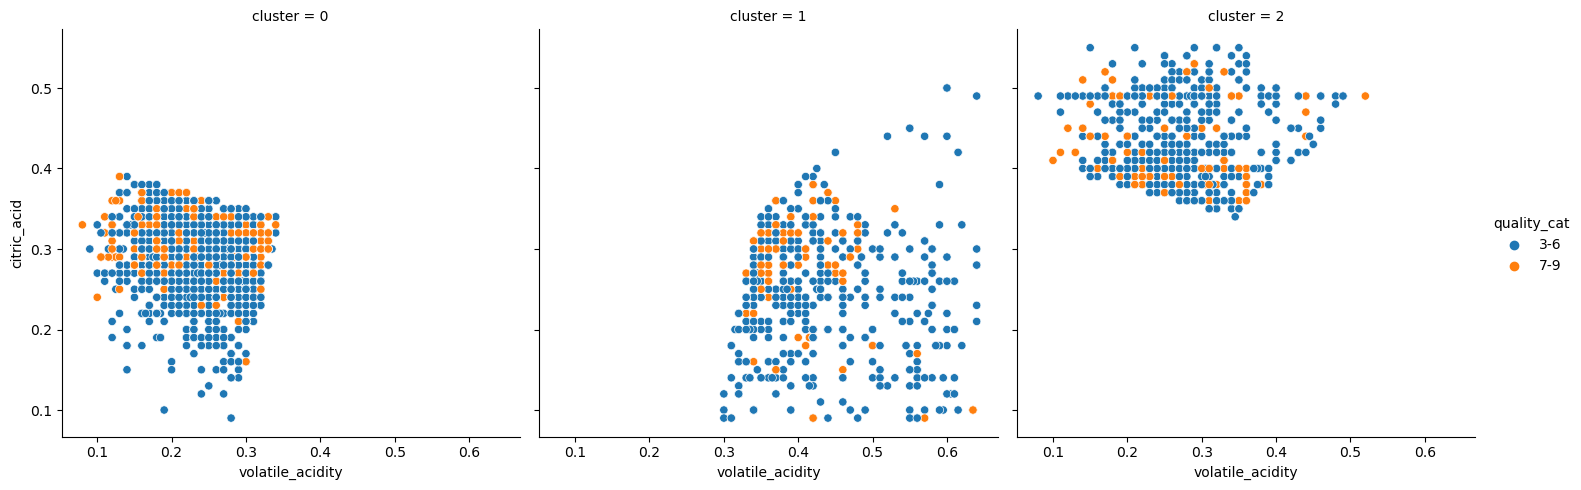

In [53]:
# create the first scatter plot
sns.relplot(data=X_tr6,
           x='volatile_acidity',
           y='citric_acid',
           hue='cluster',
           col='cluster',
           col_wrap=3)

# create the second scatter plot
sns.relplot(data=X_tr6.join(y_tr2),
           x='volatile_acidity',
           y='citric_acid',
           hue='quality_cat',
           col='cluster',
           col_wrap=3)

# show the plots
plt.show()

### Takeaways
* No clusters

### Stat T Test

In [66]:
kmeans.fit(tr.drop(columns=['quality', 'quality_cat', 'cluster']))

KMeans(n_clusters=3, random_state=123)

In [67]:
# And assign the cluster number to a column on the dataframe
tr["cluster"] = kmeans.predict(tr.drop(columns=['quality', 'quality_cat', 'cluster']))
tr.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type_white_wine,quality_cat,cluster
1377,7.1,0.44,0.37,2.7,0.041,35.0,128.0,0.98960,3.07,0.43,13.5,7,1,7-9,0
2596,6.5,0.23,0.36,16.3,0.038,43.0,133.0,0.99924,3.26,0.41,8.8,5,1,3-6,0
3016,6.7,0.33,0.36,6.6,0.042,34.0,116.0,0.99123,2.97,0.31,12.2,8,1,7-9,0
3852,7.5,0.21,0.29,1.5,0.046,35.0,107.0,0.99123,3.15,0.45,11.3,6,1,3-6,0
1507,8.2,0.22,0.36,6.8,0.034,12.0,90.0,0.99440,3.01,0.38,10.5,8,1,7-9,2
